In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats

In [2]:
members = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\members_v3.csv')
members =members.loc[(members['bd']>2) & (members['bd']<99)]
train = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\train.csv')
df = pd.merge(members,train,how='inner',on=['msno'])
df = df.iloc[0:50000]
msnos = df['msno']
relevant_user_logs = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\relevant_user_logs.csv')
#relevant_transactions = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\relevant_transactions.csv')                                 

In [3]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'],format='%Y%m%d')

In [ ]:
#df_new = relevant_user_logs.groupby(['msno']).agg({'num_25' : ['sum', 'mean', 'count'],'num_50' : ['sum', 'mean', 'count']}).reset_index
#df_new

In [4]:
mean_user_logs = pd.DataFrame(index=[],columns=[])

In [ ]:
#relevant_user_logs = relevant_user_logs.groupby(['msno','date']).sum()

In [5]:
mean_user_logs['num_25'] = relevant_user_logs.groupby('msno')['num_25'].mean()
mean_user_logs['num_50'] = relevant_user_logs.groupby('msno')['num_50'].mean()
mean_user_logs['num_75'] = relevant_user_logs.groupby('msno')['num_75'].mean()
mean_user_logs['num_985'] = relevant_user_logs.groupby('msno')['num_50'].mean()
mean_user_logs['num_100'] = relevant_user_logs.groupby('msno')['num_100'].mean()
mean_user_logs['num_unq'] = relevant_user_logs.groupby('msno')['num_unq'].mean()
mean_user_logs['total_secs'] = relevant_user_logs.groupby('msno')['total_secs'].mean()
mean_user_logs['days_logged'] = relevant_user_logs.groupby('msno')['date'].count()

In [6]:
mean_user_logs = mean_user_logs.reset_index()

In [7]:
df = pd.merge(df,mean_user_logs,how='inner',on='msno')

In [21]:
df.head()

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,days_logged
0,tlGR5F/+vDFsnQme+KnvXKsCh3y31I1/dBaGuHDfdII=,5,39,female,7,2011-10-12,0,0.000000,0.0,0.666667,0.0,11.666667,5.666667,34409.561667,3
1,m0h0+lJIok7k6BzAoOnq+x+mB1tbi9shGF/egYLbed4=,4,22,female,7,2014-10-20,0,27.400000,4.6,1.400000,4.6,28.600000,50.800000,8129.652200,5
2,eIOUZ5I+NV/3EDfn/U/tMepn4FJt2SdzOrWGH1tNlYI=,5,24,male,3,2014-10-25,0,1.500000,1.5,0.500000,1.5,5.500000,6.500000,1570.918250,4
3,fkLgfIOX0bWM9/BQQChOCDzoos23szsckxPvxrBbtmY=,4,20,female,9,2014-10-29,0,12.333333,2.0,1.000000,2.0,37.333333,31.333333,8934.766667,3
4,0uAjNEzX6IY+lZ+PYv9W31mZjHxUWkbFz9LL8m9G46k=,15,23,female,7,2014-11-03,0,9.000000,2.0,2.200000,2.0,79.200000,66.600000,18840.851600,5


In [9]:
df.msno.nunique()

20618

In [10]:
df.is_churn.sum()

1199

In [11]:
df.groupby('is_churn').mean()

,city,bd,registered_via,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,days_logged
is_churn,,,,,,,,,,,
0,11.051341,30.025645,7.45337,6.039892,1.505338,0.955057,1.505338,32.097765,30.590366,8340.680574,4.148875
1,10.496247,27.412844,6.70809,6.236878,1.544384,1.036308,1.544384,28.635043,29.045927,7509.832552,3.860717


In [ ]:
df.groupby('city').mean()

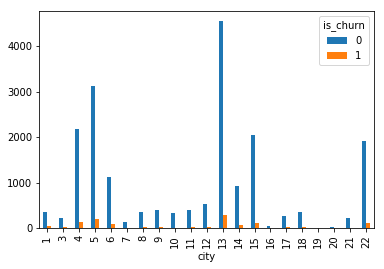

In [15]:
pd.crosstab(df.city,df.is_churn).plot(kind='bar')

In [ ]:
df.groupby('bd').mean()

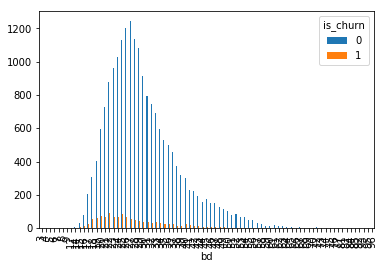

In [17]:
pd.crosstab(df.bd,df.is_churn).plot(kind='bar')

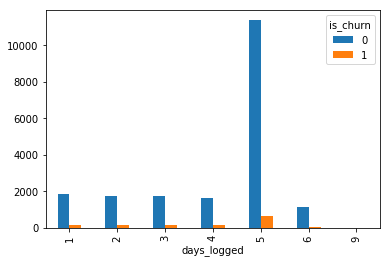

In [22]:
pd.crosstab(df.days_logged,df.is_churn).plot(kind='bar')

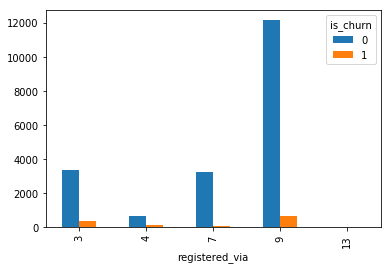

In [19]:
pd.crosstab(df.registered_via,df.is_churn).plot(kind='bar')

In [25]:
df.corr()

,city,bd,registered_via,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,days_logged
city,1.000000,-0.020445,0.045767,-0.022499,0.001224,0.001040,-0.006339,0.001040,-0.000279,-0.000679,-0.002455,0.003994
bd,-0.020445,1.000000,0.209202,-0.071810,-0.089061,-0.090175,-0.086469,-0.090175,0.022526,-0.040294,0.010269,-0.035512
registered_via,0.045767,0.209202,1.000000,-0.073980,-0.031941,-0.031360,-0.021466,-0.031360,0.010942,-0.007058,0.007218,-0.019007
is_churn,-0.022499,-0.071810,-0.073980,1.000000,0.005029,0.003880,0.013094,0.003880,-0.022791,-0.013198,-0.022951,-0.046399
num_25,0.001224,-0.089061,-0.031941,0.005029,1.000000,0.533542,0.422364,0.533542,0.069331,0.414502,0.118600,0.021858
num_50,0.001040,-0.090175,-0.031360,0.003880,0.533542,1.000000,0.591780,1.000000,0.078209,0.325399,0.143024,0.032062
num_75,-0.006339,-0.086469,-0.021466,0.013094,0.422364,0.591780,1.000000,0.591780,0.102863,0.301384,0.173186,0.031214
num_985,0.001040,-0.090175,-0.031360,0.003880,0.533542,1.000000,0.591780,1.000000,0.078209,0.325399,0.143024,0.032062
num_100,-0.000279,0.022526,0.010942,-0.022791,0.069331,0.078209,0.102863,0.078209,1.000000,0.783419,0.982416,0.076924
num_unq,-0.000679,-0.040294,-0.007058,-0.013198,0.414502,0.325399,0.301384,0.325399,0.783419,1.000000,0.819015,0.068628


In [27]:
stats.pearsonr(df.is_churn,df.num_100)

(-0.02279101560069628, 0.0010649473416247186)

In [29]:
stats.pearsonr(df.is_churn,df.bd)

(-0.07180958484111252, 5.499064593256068e-25)

In [30]:
stats.pearsonr(df.is_churn,df.num_unq)

(-0.013198245185535945, 0.05807920609498459)

In [31]:
stats.pearsonr(df.is_churn,df.total_secs)

(-0.022951261045927235, 0.0009814226796944717)

In [32]:
stats.pearsonr(df.is_churn,df.num_25)

(0.0050291289786825386, 0.4702379954006739)

In [33]:
stats.pearsonr(df.is_churn,df.num_50)

(0.0038802181273000402, 0.5774402186936722)

In [34]:
stats.pearsonr(df.is_churn,df.num_75)

(0.013093945312760204, 0.06009142669065864)

In [35]:
stats.pearsonr(df.is_churn,df.num_985)

(0.0038802181273000402, 0.5774402186936722)

In [36]:
stats.bayes_mvs(df.bd)

(Mean(statistic=29.87370258996993, minmax=(29.77615773088007, 29.971247449059792)),
 Variance(statistic=72.51048217791646, minmax=(71.33580162202442, 73.6851627338085)),
 Std_dev(statistic=8.515308695397746, minmax=(8.446334064065418, 8.584283326730073)))

In [37]:
stats.bayes_mvs(df.total_secs)

(Mean(statistic=8292.364210478978, minmax=(8195.314216292625, 8389.41420466533)),
 Variance(statistic=71776627.56999883, minmax=(70613835.5674977, 72939419.57249996)),
 Std_dev(statistic=8472.108803007597, minmax=(8403.484094004312, 8540.733512010882)))